# **Hand-written digits classification using Feed Forward Neural Networks**

---

Hand-written digits classification is a classic classification task that can performed using a multitude of methods. In this implementation, I performed the classification task by employing a ***Neural Network***. 

All the functions are coded from scratch, using only python standard libraries

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Functions required for Neural Networks**

---

## **Initializing parameters for all layers**

---

     dim( W[l] ) = ( n[l], n[l-1] )
      dim( b[l] ) = ( 1, n[l] )
      where, 
        l = current layer
        W[l] = weights of current layer
        b[l] = bias for the current layer
        n[l] = number of nodes in current layer

In [66]:
def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims)
  
    for i in range(1, L):
        parameters['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1])*0.01
        parameters['b' + str(i)] = np.zeros((1, layer_dims[i])) + 0.01

    return parameters

## **Forward propagation**

---

*   Activation function: sigmoid

Forward propagation equations:
        
        Z[l] = W[l].X + b[l] 
        A[l] = g( Z[l] )
        Where,
            Z = weighted sum of input and bias
            A = activations of particular layer
            l = layer

## **Backward propagation**

---

Backward propagation equations: 

          Err(j)(output layer) = O(j)(1 - O(j))(T(j) - O(j))
          Err(j)(hidden layer) = O(j)(1 - O(j))(SUM(Err(k)W(j,k)
          del(W(i,j)) = (l)Err(j)O(i)
          del(b(j)) = (l)Err(j)
          Where,
                O: Output of a node
                W: weight
                b: bias
                i, j, k: nodes


## **Implementation**

---

In [67]:
def sigmoid(X):
    return 1/(1 + np.exp(-1*X))

In [68]:
def forward_step(A_prev, W, b):
    return sigmoid(np.dot(A_prev, W.T) + b)

In [69]:
def computation_n(X, y, parameters, eta, num_iters):
    hidden_output = []
    hidden_error = []
    m = X.shape[0]
    L = (len(parameters)//2) + 1      # number of layers
    
    # iterating for given number of iterations
    for itr in range(num_iters):
        # for each training example
        for i in range(m):
            # forward propagation for n layers
            hidden_output.append(X[i])
            A_prev = X[i]
            for l in range(1, L):
                A_prev = forward_step(A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
                hidden_output.append(A_prev)
            
            # propagating the error backwards
            # print('hidden_output[-1].shape: {}; y[i].shape: {}'.format(hidden_output[-1].shape, y[i].shape))
            dOutput = hidden_output[-1]*(1 - hidden_output[-1])*(y[i] - hidden_output[-1])
            hidden_error.append(dOutput)
            k = 0
            for l in reversed(range(1, L-1)):
                error = hidden_output[l]*(1 - hidden_output[l])*np.dot(hidden_error[k], parameters['W' + str(l+1)])
                hidden_error.append(error)
                k += 1
            
            # parameter changes
            k = 0
            for l in reversed(range(1, L)):
                parameters['W' + str(l)] += eta*hidden_error[k].reshape(-1, 1)*hidden_output[l-1]
                parameters['b' + str(l)] += eta*hidden_error[k]
                k += 1
            
            hidden_output.clear()
            hidden_error.clear()
    
    return parameters

## **Training and testing model**

---


In [70]:
def train(X, y, parameters, alpha, num_iters, batch=True):
    parameters = computation_n(X, y, parameters, alpha, num_iters)
    return parameters

In [71]:
def test(X, y_test, parameters):
    y_pred = []
    L = (len(parameters)//2) + 1
    counter = 0

    for i in range(X.shape[0]):
        A_prev = X[i]
        for l in range(1, L):
            A_prev = forward_step(A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
        y_pred.append(A_prev)


    y_pred = np.asarray(y_pred)
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1

    accuracy = np.mean(np.asarray(y_pred) == y_test)
    print("Accuracy : {} %".format(accuracy*100))

# **Hand-written digits: Loading + Formatting + Training + Testing**

In [72]:
def modify_label(y, n):
  new_y = []
  for i in range(y.shape[0]):
    row = np.zeros(n)
    print(type(y[i, 0]))
    break
    row[y[i, 0]] = 1.
    new_y.append(row)

  return np.asarray(new_y)

Sample of images from the MNIST Dataset : 


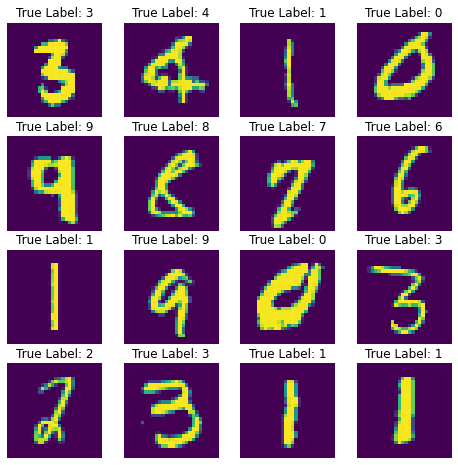

In [73]:
## LOADING TRAINING DATA 
data = pd.read_csv('/content/drive/MyDrive/mnist_train.csv')
y_train = np.array(data['label'])
x_train = np.array(data.drop(['label'], axis = 1))

## LOADING TESTING DATA
data = pd.read_csv('/content/drive/MyDrive/mnist_test.csv')
y_test = np.array(data['label'])
x_test = np.array(data.drop(['label'], axis = 1))

## PRINTING IMAGES FROM THE MNIST DATASET
print("Sample of images from the MNIST Dataset : ")
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    r = np.random.randint(x_train.shape[0])   ## PICK A RANDON IMAGE TO SHOW
    plt.title('True Label: '+ str(y_train[r])) ## PRINT LABEL
    plt.imshow(x_train[r].reshape(28, 28))     ## PRINT IMAGE
plt.show()

In [74]:
## NORMALIZING THE PIXEL VALUES FOR TRAINING DATA
x_train = x_train / 255

## CONVERTING TARGET VALUE TO ONE-HOT ENCODED FORM
x_train = np.array(x_train)
b = np.zeros((y_train.size, y_train.max()+1))
b[np.arange(y_train.size), y_train] = 1
y_train = np.array(b)
y_train = np.expand_dims(y_train, axis=1)

print("y_train shape (after one-hot encoding) : {}".format(y_train.shape))

y_train shape (after one-hot encoding) : (60000, 1, 10)


In [75]:
## NORMALIZING THE PIXEL VALUES FOR TESTING DATA
x_test = x_test / 255

## CONVERTING TARGET VALUE TO ONE-HOT ENCODED FORM
x_test = np.array(x_test)
b1 = np.zeros((y_test.size, y_test.max()+1))
b1[np.arange(y_test.size), y_test] = 1
y_test = np.array(b1)
y_test = np.expand_dims(y_test, axis=1)

print("y_test shape (after one-hot encoding) : {}".format(y_test.shape))

y_test shape (after one-hot encoding) : (10000, 1, 10)


In [76]:
parameters = initialize_parameters([784, 50, 50, 10])
print("Length of parameters dictionary : {}".format(len(parameters)))

Length of parameters dictionary : 6


In [77]:
print("Training model...")
parameters = train(x_train, y_train, parameters, 0.01, 20)

Training model...


In [78]:
print("Testing model...")
print('Training error : ', end='')
test(x_train, y_train, parameters)
print('\nTesting error : ', end='')
test(x_test, y_test, parameters)

Testing model...
Training error : Accuracy : 98.791 %

Testing error : Accuracy : 98.772 %
